# Lorenz & Gini coefficent Aus, Italian & US data

## Overview

We will use australian, Italian and US household data on income and wealth to plot the lorenz curve and determine the Gini coefficent. 

## Australia

We can source Australian data from the Household, Income and Labour Dynamics in Australia (HILDA) data set. 

We will require the following imports.

In [3]:
import pandas as pd
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline

First we need to import the data from the HILDA.

The data set has 18 waves each wave represents a finanical year. The 18th wave represents the 2017-18 financial year. In the data set the number wave is represented by the alphabet. Hence 'r' represents the fact the data is from the 18th wave.

### Income

In [18]:
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n','o', 'p', 'q', 'r']
len(letter)

18

In [8]:
path1 = r'~/Documents/projects/lorenz_curve/Household_'+letter+'180c.dta'
hilda_household = pd.read_stata(path1)

I will determine fininacial year (2017-18) household disposable regular income. Disposable regular income is  all wages business income, investment income, regular private pensions, regular private transfers, other regular public income and foreign pensioins after tax. 

According to the [HILDA](https://melbourneinstitute.unimelb.edu.au/__data/assets/pdf_file/0008/3247289/HILDA-User-Manual-Release-18.0.pdf) data user manual (page 68), disposable regular income is the difference between the variables rhifdip and rhifdin. rhifdip represents the positive values while rhifdin represents the negative values. 

In [9]:
hifdip = np.array(hilda_household[letter+'hifdip'])

In [10]:
hifdin = np.array(hilda_household[letter+'hifdin'])

In [11]:
hh_disposable_regular_income = hifdip - hifdin

Now with this we can use the ``lorenz_curve`` function from quantecon to plot the lorenz curve for household disposable regular income. 

In [12]:
hh_disposable_regular_income.sort()
x, y = qe.lorenz_curve(hh_disposable_regular_income)

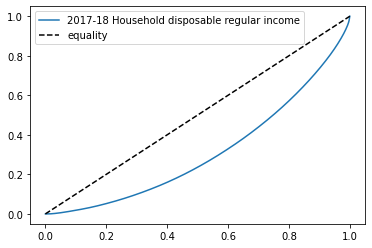

In [13]:
plt.figure()

plt.plot(x, y, label='2017-18 Household disposable regular income')

plt.plot(x, x, 'k--', label='equality')

plt.legend()
plt.show()

We can also determine the gini coefficient.

In [9]:
qe.gini_coefficient(hh_disposable_regular_income)

0.3798976683281641

This is a little different to what has been recored by the [world bank](https://data.worldbank.org/indicator/SI.POV.GINI?locations=AU) who records australias income gini coefficient to be 0.344 

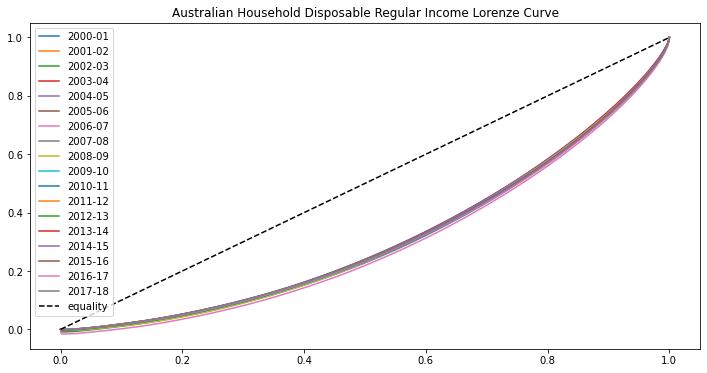

In [50]:
plt.figure(figsize=(12, 6))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n','o', 'p', 'q', 'r']
year = ['2000-01', '2001-02', '2002-03','2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18']
gini = []
for i, letter in enumerate(letters):
    path1 = r'~/Documents/projects/lorenz_curve/Household_'+letter+'180c.dta'
    hilda_household = pd.read_stata(path1)
    hifdip = np.array(hilda_household[letter+'hifdip'])
    hifdin = np.array(hilda_household[letter+'hifdin'])
    hh_disposable_regular_income = hifdip - hifdin
    hh_disposable_regular_income.sort()
    x, y = qe.lorenz_curve(hh_disposable_regular_income)
    plt.plot(x, y, label= year[i])
    gini.append(qe.gini_coefficient(hh_disposable_regular_income))
    
plt.plot(x, x, 'k--', label='equality')
plt.title('Australian Household Disposable Regular Income Lorenze Curve')
plt.legend()
plt.show()

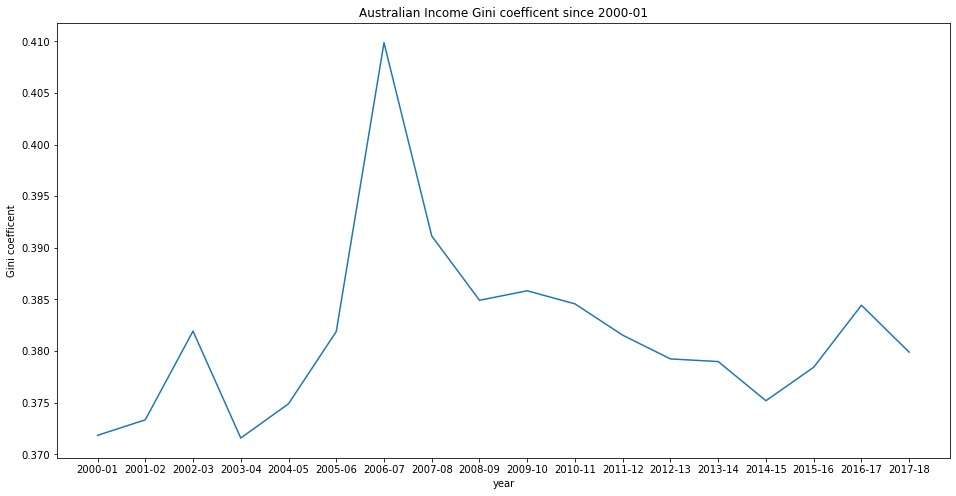

In [49]:
plt.figure(figsize=(16, 8))

plt.plot(year, gini, label = 'Gini coefficent over the years')
plt.title('Australian Income Gini coefficent since 2000-01')
plt.ylabel('Gini coefficent')
plt.xlabel('year')
plt.legend
plt.show()

## Wealth


I will now determine the gini coefficent for household wealth. Te [HILDA](https://melbourneinstitute.unimelb.edu.au/__data/assets/pdf_file/0008/3247289/HILDA-User-Manual-Release-18.0.pdf) data user manual on page 84 explains how net worth is calculated. 

In [10]:
hwnwip = np.array(hilda_household['rhwnwip'])

In [11]:
hwnwin = np.array(hilda_household['rhwnwin'])

In [12]:
net_wealth = hwnwip - hwnwin

In [14]:
net_wealth.sort()
x_1, y_1 = qe.lorenz_curve(net_wealth)

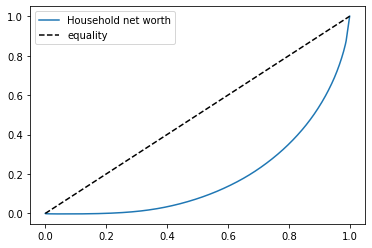

In [15]:
plt.figure()

plt.plot(x_1, y_1, label='Household net worth')
plt.plot(x_1, x_1, 'k--', label='equality')

plt.legend()
plt.show()

In [16]:
qe.gini_coefficient(net_wealth)

0.6416459780522372

Clearly we can see that the lorenze furve for welath is more scewed tot he right than for income. and as a result the gini coefficent for wealth is must higher. 

We can see this directly by ploting wealth and income on the same plot.

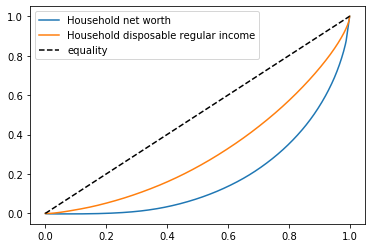

In [17]:
plt.figure()

plt.plot(x_1, y_1, label='Household net worth')
plt.plot(x, y, label='Household disposable regular income')
plt.plot(x_1, x_1, 'k--', label='equality')

plt.legend()
plt.show()

## Italy

I will be checking natasha's work which can be found [here](https://github.com/jstac/nyu_lecture_notes/blob/master/figures_source/lorenz_curve_italy.ipynb).

I have downloaded two file ``'rfam16.dta'`` and ``'ricfam16.dta'`` which have household net disposable income and household net wealth respectively. These files are sourced from [the bank of Italy](https://www.bancaditalia.it/statistiche/tematiche/indagini-famiglie-imprese/bilanci-famiglie/distribuzione-microdati/index.html) which you can find in a compressed folder called 'Shiw 2016 - STATA' which you can open [here](https://www.bancaditalia.it/statistiche/tematiche/indagini-famiglie-imprese/bilanci-famiglie/distribuzione-microdati/documenti/ind16_stata.zip?language_id=1)

Once I have extracted and stored ``'rfam16.dta'`` and ``'ricfam16.dta'`` files I can begin.

### Income

In [18]:
path2 = r'C:\Users\harve\Documents\QuantEcon\projects\lorenz_curve\rfam16.dta'
income = pd.read_stata(path2)
income

,nquest,y,yl,yl1,yl2,yt,ytp,ytp1,ytp2,yta,...,yca,yca1,yca2,ycf,ycf1,ycf2,ycf3,ycf4,cly,cly2
0,173,16636.652344,0.0,0.0,0.0,9400.0,23400.0,23400.0,0,-14000,...,7200.000000,0.000000,7200.0,36.652817,36.652817,0.000000,0.000000,0.0,3,2
1,375,13939.661133,0.0,0.0,0.0,9100.0,9100.0,9100.0,0,0,...,4825.000000,0.000000,4825.0,14.661126,14.661126,0.000000,0.000000,0.0,2,1
2,633,20305.498047,0.0,0.0,0.0,14300.0,14300.0,14300.0,0,0,...,6000.000000,0.000000,6000.0,5.497922,5.497922,0.000000,0.000000,0.0,4,2
3,923,13874.424805,0.0,0.0,0.0,8450.0,8450.0,8450.0,0,0,...,5400.000000,0.000000,5400.0,24.424614,24.424614,0.000000,0.000000,0.0,2,1
4,1367,14155.201172,0.0,0.0,0.0,10530.0,10530.0,10530.0,0,0,...,3600.000000,0.000000,3600.0,25.201653,25.201653,0.000000,0.000000,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,928511,4400.000000,0.0,0.0,0.0,4400.0,0.0,0.0,0,4400,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1,1
7416,928512,18218.640625,19000.0,14000.0,5000.0,-5400.0,600.0,600.0,0,-6000,...,4600.000000,0.000000,4600.0,18.640512,18.640512,0.000000,0.000000,0.0,4,2
7417,928513,26900.000000,9000.0,9000.0,0.0,14300.0,14300.0,14300.0,0,0,...,3600.000000,0.000000,3600.0,0.000000,0.000000,0.000000,0.000000,0.0,6,3
7418,928514,14295.498047,0.0,0.0,0.0,9490.0,9490.0,9490.0,0,0,...,4800.000000,0.000000,4800.0,5.497922,5.497922,0.000000,0.000000,0.0,2,1


the variable ``y`` represents net disposible income and is what I will use to determine the lorenz curve and gini coefficent. More detail on the varibales in this file can be found [here](https://www.bancaditalia.it/statistiche/tematiche/indagini-famiglie-imprese/bilanci-famiglie/documentazione/documenti/2016/eng_Legen16.pdf?language_id=1)

I'll use the quantecon library to determine the lorenz curve and gini coefficient. The documentation of these functions can be found [here](https://quanteconpy.readthedocs.io/en/latest/tools/inequality.html)

In [19]:
l_vals, f_vals = qe.lorenz_curve(income.y.values)

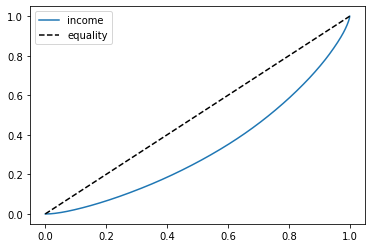

In [20]:
plt.figure()

plt.plot(l_vals, f_vals, label='income')
plt.plot(l_vals, l_vals, 'k--', label='equality')
plt.legend()

plt.show()

Now let look at what the gini coefficient of this lorenz curve is

In [21]:
qe.gini_coefficient(income.y.values)

0.3490282500006961

This is pretty good. According to the [world bank](https://data.worldbank.org/indicator/SI.POV.GINI?locations=IT) the gini coefficient for Italy is 0.354 as of 2015.

In [22]:
path3 = r'C:\Users\harve\Documents\QuantEcon\projects\lorenz_curve\ricfam16.dta'
wealth = pd.read_stata(path3)
wealth

,nquest,ar2,ar3,bd1,bd2,bd,af1,af2,af3,af4,pf1,pf2,pf3,pf,ar1,ar,af,w,clw,clw2
0,173,0.0,1000,6000,6000.000000,12000.000000,10000.000000,0.0,0.00000,0,0.000000,0,0,0.000000,120000.0,121000.0,10000.000000,1.310000e+05,6,3
1,375,0.0,0,500,9904.016602,10404.016602,4000.000000,0.0,0.00000,0,0.000000,0,0,0.000000,193000.0,193000.0,4000.000000,1.970000e+05,7,4
2,633,0.0,3000,5000,10000.000000,15000.000000,1500.000000,0.0,0.00000,0,0.000000,0,0,0.000000,200000.0,203000.0,1500.000000,2.045000e+05,7,4
3,923,0.0,400,0,5000.000000,5000.000000,6663.775391,0.0,0.00000,0,0.000000,0,0,0.000000,270000.0,270400.0,6663.775391,2.770638e+05,8,4
4,1367,0.0,5000,0,10000.000000,10000.000000,6875.775391,0.0,0.00000,0,0.000000,0,0,0.000000,60000.0,65000.0,6875.775391,7.187577e+04,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,928511,0.0,0,0,1500.000000,1500.000000,0.000000,0.0,0.00000,3600,0.000000,0,2800,2800.000000,0.0,0.0,3600.000000,8.000000e+02,1,1
7416,928512,0.0,200,0,0.000000,0.000000,5085.697754,0.0,0.00000,0,7000.000000,0,0,7000.000000,20000.0,20200.0,5085.697754,1.828570e+04,3,2
7417,928513,0.0,0,0,0.000000,0.000000,0.000000,0.0,0.00000,0,0.000000,0,0,0.000000,0.0,0.0,0.000000,0.000000e+00,1,1
7418,928514,0.0,1000,0,15000.000000,15000.000000,1500.000000,0.0,0.00000,0,0.000000,0,0,0.000000,180000.0,181000.0,1500.000000,1.825000e+05,7,4


The varibale ``w`` represents household net wealth and is what I will use to determine the lorenze curve and gini coefficent for household wealth.

In [23]:
l_vals2, f_vals2 = qe.lorenz_curve(wealth.w.values)

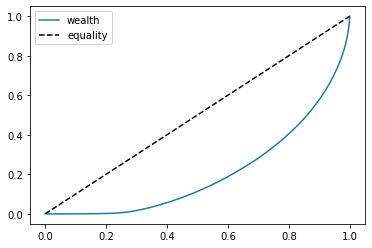

In [24]:
plt.figure()

plt.plot(l_vals2, f_vals2, label='wealth')
plt.plot(l_vals, l_vals, 'k--', label='equality')
plt.legend()

plt.show()

In [25]:
qe.gini_coefficient(wealth.w.values)

0.5886418992931254

Lets plot both lorenz curves for income and wealth on the same plot to clearly see which is has the largest inequality.

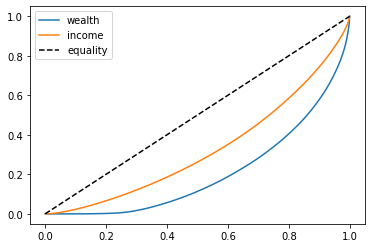

In [26]:
plt.figure()

plt.plot(l_vals2, f_vals2, label='wealth')
plt.plot(l_vals, f_vals, label='income')
plt.plot(l_vals, l_vals, 'k--', label='equality')
plt.legend()

plt.show()